# Определение перспективного тарифа для оператора сотовой связи

## Описание проекта

Оператор сотовой связи предлагает два тарифных плана: Smart и Ultra. Необходимо разобраться, какой тариф приносит больший доход и является наиболее перспективным с точки зрения продвижения среди потенциальных клиентов. С этой целью компания предоставила для анализа небольшую выборку клиентов (500 человек).

**Цель проекта**

Исследовать по выборочным данным поведение клиентов телекоммуникационной компании и выявить наиболее перспективный тариф с точки зрения получения прибыли, привлечения новых клиентов и удержания настоящих.

**Задачи проекта**
1. Изучить исходные датасеты на предмет корректного типа данных, отсутствующих значений, наличия дубликатов и прочих несоответствий.
2. Рассчитать необходимые для дальнейшего анализа параметры.
3. Изучить общую статистику по звонкам, сообщениям и интернет-трафику.
4. Сформулировать гипотезы о доходности тарифов и провести проверку этих гипотез.

## Изучение исходных данных

In [1]:
from scipy import stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import math
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

Упростим просмотр таблиц и статистики, выведем их вместе. Для этого создадим словарь для всех датафреймов с заголовками и сохраним в переменной data. Напишем цикл для просмотра.

In [3]:
data = {'Данные по пользователям': users, 'Статистика звонков': calls, 'Статистика сообщений': messages, 'Статистика интернет-соединений': internet, 'Справка о тарифах': tariffs}

In [4]:
for i in range(0,5):
    print(list(data.keys())[i])
    display(list(data.values())[i].head())
    display(list(data.values())[i].info())
    if list(data.keys())[i] == 'Справка о тарифах':
        continue
    display(list(data.values())[i].describe())
    print('-----------------------------------------------------------------')

Данные по пользователям


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


-----------------------------------------------------------------
Статистика звонков


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


-----------------------------------------------------------------
Статистика сообщений


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


-----------------------------------------------------------------
Статистика интернет-соединений


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


-----------------------------------------------------------------
Справка о тарифах


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

В таблице calls (параметр duration) обнаружены значения, равные 0. Посчитаем, какова их доля в датафрейме.

In [5]:
print('Доля нулей в параметре длительности звонков, датафрейм calls: {:.2f}'.format(len(calls['duration'][calls['duration'] == 0]) / len(calls)))

Доля нулей в параметре длительности звонков, датафрейм calls: 0.20


Доля составлятяет пятую часть датафрейма, посмотрим, как распределяются наши данные по длительности звонков на графике. Для построения гистограммы сначала отдельно выделим датасет (назовем его calls2) без нулевых значений и сравним вместе два распределения (с нулем и без нулей в параметре duration).

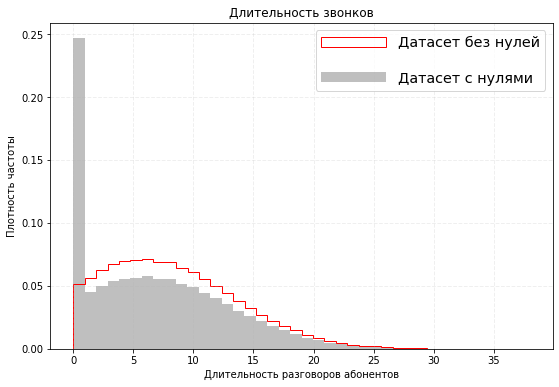

In [6]:
calls2 = calls.query('duration != 0').copy()

fig, ax = plt.subplots(figsize=(9,6))
ax.hist(calls['duration'], density=True, bins=40, color='grey', alpha=0.5, histtype='bar')
ax.hist(calls2['duration'], density=True, bins=40, color='red', histtype='step')
ax.set_title('Длительность звонков')
ax.set_xlabel('Длительность разговоров абонентов')
ax.set_ylabel('Плотность частоты')
ax.grid(alpha=0.2, linestyle='--', linewidth=1)
labels= ["Датасет без нулей", "Датасет с нулями"]
ax.legend(labels, fontsize='x-large', labelspacing=1.5, handlelength=4.5)

На графике видно, что значения можно считать нормально распределенными за исключением двух обстоятельств: с левой стороны график будто обрезан нулем, и там же наблюдается высокий пик. Эти показатели сильно выбиваются из общего ряда.

Также посчитаем долю нулей в датафрейме internet (параметр mb_used).

In [7]:
print('Доля нулей в объеме сетевого трафика, датафрейм internet {:.2f}'.format(len(internet.query('mb_used == 0')) / len(internet)))

Доля нулей в объеме сетевого трафика, датафрейм internet 0.13


Доля довольно большая, посмотрим, как это выглядит на гистограмме. Точно так же, как и со звонками, сохраним отдельно датафрейм (internet2) без нулей в параметре mb_used и сравним два набора.

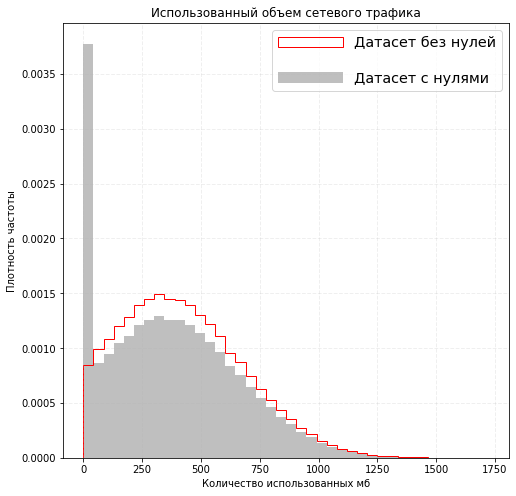

In [8]:
internet2 = internet.query('mb_used != 0').copy()

fig, ax = plt.subplots(figsize=(8,8))
ax.hist(internet['mb_used'], density=True, bins=40, color='grey', alpha=0.5, histtype='bar')
ax.hist(internet2['mb_used'], density=True, bins=40, color='red', histtype='step')
ax.set_title('Использованный объем сетевого трафика')
ax.set_xlabel('Количество использованных мб')
ax.set_ylabel('Плотность частоты')
ax.grid(alpha=0.2, linestyle='--', linewidth=1)
labels= ["Датасет без нулей", "Датасет с нулями"]
ax.legend(labels, fontsize='x-large', labelspacing=1.5, handlelength=4.5)

В целом картина похожа на ситуацию со звонками: такой же большой выступ из-за нулей. Хорошо бы понять причину появления этих значений. Есть вероятность, что кроме технических сбоев это могут быть какие-то бесплатные услуги, которые предлагает сотовый оператор. Например, пакет интернета не расходуется при подключении к социальным сетям (Facebook, Instagram, Twitter, TikTok, ВКонтакте) или использовании приложений. Сессия засчиталась, но мегабайты не потратились.

Проверим таблицы на наличие дубликатов

In [9]:
print(users.duplicated().sum())
print(calls.duplicated().sum())
print(messages.duplicated().sum())
print(internet.duplicated().sum())

0
0
0
0


### Вывод

Для анализа данных предоставлено 5 таблиц, каждая из которых содержит свой фрагмент общей картины: информация по пользователям, совершенным звонкам, посланным сообщениям, объеме использованного сетевого трафика и общая справка о тарифах.

Датафрейм users
- Содержит данные пользователей, всего 500 записей, 8 столбцов
- Churn_date и reg_date в формате object, а нужна дата.
- Большое количество пропущенных значений в колонке churn_date, видимо, подавляющее большинство абонентов до сих пор пользуются тарифом.

Датафрейм calls
- Включает всю информацию по звонкам, всего 202607 записей, 4 колонки.
- Столбец call_date - тип данных object, нужно перевести в дату.
- Длительность звонка (duration) - тип данных float, поскольку сам оператор округляет до целых значений в большую сторону, переведем в int (тоже в большую сторону).
- Также в столбце duration большое количество (почти 20%) значений, равных нулю. Возможно, это пропущенные вызовы.

Датафрейм messages
- Здесь перечислены записи по всем сообщениям, всего 123036 строк, 3 параметра.
- Колонка message_date имеет тип данных object, нужно перевести в дату.

Датафрейм internet
- Содержит информацию о трафике с устройств пользователей, 149396 записей, 5 параметров
- Тип данных столбца mb_used - float, т.к. оператор окргуляет в сторону больших значений, переведем в int, округлим тоже в сторону увеличения.
- Тип данных session_date - object, нужно перевести в дату.
- В столбце mb_used большое количество (порядка 13%) значений, равных нулю.

Датафрейм tariffs
- Носит справочный характер, предоставляет информацию о тарифах, в проекте таблица изменятся не будет.

Дубликатов во всех датафреймах не обнаружено.

## Обработка пропущенных значений, изменение типа данных

Доли нулевых значений в датафреймах calls (параметр duration) и internet (параметр mb_used) довольно большие (20% и 13% соответственно). Это вполне могут быть пропущенные вызовы, кто-то мог обменяться номерами и просто набрал номер собеседника (чтоб не диктовать и не записывать), а потом сбросил. 
Подобные бессодержательные звонки могут сильно повлиять на средние значения в исследовании. Поэтому решено учитывать только те разговоры, которые состоялись. Они имеют длительность и, соответственно, стоимость. Что касается нулей в интернет-трафике, то это может быть все, что угодно: от использования приложений, меседжеров и социальных сетей до технического сбоя.
Чтобы не искажать результаты исследования, записи с нулями удаляем.

In [10]:
calls = calls.query('duration != 0')
internet = internet.query('mb_used != 0')

Поменяем типы данных в ряде столбцов датафреймов.
Чтобы окончательно не запутаться в обилии таблиц и не раздувать проект ячейками с однотипными действиями, преобразование типов данных и присвоение групп будет произведено в одних ячейках, но с добавлением комментариев в самом коде. Как ниже:

In [11]:
# в users
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')

# в calls
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
calls['duration'] = np.ceil(calls['duration']).astype('int')

# в messages
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')

# в internet
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')
internet['mb_used'] = np.ceil(internet['mb_used']).astype('int')

Добавим столбцы с месяцами в датафреймах calls, messages и internet, опять в одной ячейке.

In [12]:
# в calls
calls['call_month'] = pd.DatetimeIndex(calls['call_date']).month

# в messages
messages['message_month'] = pd.DatetimeIndex(messages['message_date']).month

# в internet
internet['session_month'] = pd.DatetimeIndex(internet['session_date']).month

### Вывод

В целом исходные наборы данных заполнены довольно аккуратно. Пропущенные значения есть только в столбце сhurn_date, но они появились там по объективным причинам: запись добавляется лишь в том случае, если клиент расторг договор на обслуживание. А подавляющее большинство клиентов действующие, поэтому там ничего нет. Эта графа изменениям не подвергалась.

Вопрос о судьбе нулевых значений длительности звонков, колонка duration и сетевого трафика, столбец mb_used (именно нули, а не пропуски) решился их удалением. При описании распределений и сравнении выборок среднее играет большую роль. И если NaN не влияет на значение среднего, то наличие нуля в ячейке еще как. В итоге результаты исследования могут "поплыть", поэтому (несмотря, что доля таких звонков и подключений к интернету составляет порядка 20% и 13% соответственно) такие записи удалены и в дальнейшем анализе никак не учитываются.

## Расчеты параметров, преобразование таблиц

Прежде чем посчитать среднюю длительность разговора в месяц, округлим все значения в столбце duration до целого числа в сторону повышения. 

In [13]:
calls['duration'] = np.ceil(calls['duration'])

Соберем в одни таблицы необходимые для анализа данные. Нам потребуется объединить количество и длительность звонков, количество сообщений и использованного трафика с названием тарифа. Название "лежит" в датасете users, его и возьмем за основу, а к нему уже будем "цеплять" нужные столбцы.
Сгруппируем данные по месяцам в четырех датафреймах (количество звонков, длительность звонков, количество сообщений и объем использованного трафика) с помощью сводных таблиц, таблицы сохраним в новых переменных.

In [14]:
# в calls
calls_group_count = users.set_index('user_id').join(calls.set_index('user_id'), on='user_id', how='left', rsuffix='_y').pivot_table(index=['tariff','user_id'], columns='call_month', values='duration', aggfunc='count') 
calls_group_count.columns = ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12')
print('\n', 'Количество всех разговоров за месяц')
display(calls_group_count.head())
calls_group_duration = users.set_index('user_id').join(calls.set_index('user_id'), on='user_id', how='left', rsuffix='_y').pivot_table(index=['tariff','user_id'], columns='call_month', values='duration', aggfunc='sum')
calls_group_duration.columns = ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12')
print('\n', 'Длительность всех разговоров за месяц')
display(calls_group_duration.head())

# в messages
messages_group = users.set_index('user_id').join(messages.set_index('user_id'), on='user_id', how='left', rsuffix='_y').pivot_table(index=['tariff','user_id'], columns='message_month', values='id', aggfunc='count')
messages_group.columns = ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12')
print('\n', 'Количество отправленных сообщений за месяц')
display(messages_group.head())

# в internet
internet_group = users.set_index('user_id').join(internet.set_index('user_id'), on='user_id', how='left', rsuffix='_y').pivot_table(index=['tariff','user_id'], columns='session_month', values='mb_used', aggfunc='sum')
internet_group.columns = ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12')
print('\n', 'Количество использованного сетевого трафика за месяц')
display(internet_group.head())


 Количество всех разговоров за месяц


1     2     3     4     5     6     7     8     9    10  \
tariff user_id                                                               
smart  1001      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
       1002      NaN   NaN   NaN   NaN   NaN  14.0  21.0  37.0  25.0  24.0   
       1005     11.0  55.0  63.0  77.0  62.0  69.0  62.0  64.0  57.0  78.0   
       1006      NaN   3.0  36.0  38.0  45.0  48.0  38.0  32.0  47.0  35.0   
       1007      NaN   NaN   NaN  21.0  57.0  55.0  57.0  49.0  68.0  53.0   

                  11    12  
tariff user_id              
smart  1001     45.0  47.0  
       1002     25.0  27.0  
       1005     60.0  63.0  
       1006     46.0  44.0  
       1007     67.0  54.0


 Длительность всех разговоров за месяц


1      2      3      4      5      6      7      8      9  \
tariff user_id                                                                 
smart  1001      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
       1002      NaN    NaN    NaN    NaN    NaN  117.0  214.0  289.0  206.0   
       1005     95.0  456.0  606.0  712.0  595.0  612.0  569.0  619.0  479.0   
       1006      NaN   42.0  286.0  356.0  370.0  478.0  316.0  275.0  360.0   
       1007      NaN    NaN    NaN  198.0  480.0  545.0  577.0  458.0  655.0   

                   10     11     12  
tariff user_id                       
smart  1001       NaN  430.0  414.0  
       1002     212.0  243.0  236.0  
       1005     723.0  547.0  592.0  
       1006     267.0  372.0  379.0  
       1007     465.0  580.0  421.0


 Количество отправленных сообщений за месяц


1     2     3     4     5     6     7     8     9    10  \
tariff user_id                                                              
smart  1002     NaN   NaN   NaN   NaN   NaN   4.0  11.0  13.0   4.0  10.0   
       1005     7.0  38.0  56.0  41.0  42.0  47.0  56.0  64.0  52.0  44.0   
       1007     NaN   NaN   NaN  11.0  39.0  26.0  26.0  27.0  31.0  18.0   
       1008     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
       1009     NaN   NaN   2.0  14.0   7.0  14.0  14.0   9.0  12.0  15.0   

                  11    12  
tariff user_id              
smart  1002     16.0  12.0  
       1005     51.0  54.0  
       1007     21.0  26.0  
       1008      NaN  56.0  
       1009     11.0  12.0


 Количество использованного сетевого трафика за месяц


1       2        3        4        5        6        7  \
tariff user_id                                                                
smart  1001        NaN     NaN      NaN      NaN      NaN      NaN      NaN   
       1002        NaN     NaN      NaN      NaN      NaN  10871.0  17601.0   
       1005     2730.0  7394.0  11117.0   9365.0   7877.0   9875.0   7703.0   
       1006        NaN  1395.0  17309.0  13954.0  12984.0  12388.0  20000.0   
       1007        NaN     NaN      NaN   8031.0  17708.0  13674.0  15680.0   

                      8        9       10       11       12  
tariff user_id                                               
smart  1001         NaN      NaN      NaN  18452.0  14053.0  
       1002     20347.0  16712.0  13905.0  18610.0  18137.0  
       1005      7554.0   7027.0   7809.0  12682.0   8680.0  
       1006     19327.0  15543.0  19722.0  13275.0  18498.0  
       1007     20723.0  12630.0  14444.0  16390.0  12512.0

Рассчитаем доходы с каждого абонента по месяцам (отдельно для тарифов smart и ultra). Доходы рассчитываются следующим образом: определяется разница между пакетным предложением и фактически потраченными минутами, сообщениями и мегабайтами. Если пользователь тарифа превысил свой лимит, то эта разница умножается на стоимость одной единицы и прибавляется к ежемесячному фиксированному платежу. Если абонент уложился в рамки тарифа, то в доход записывается только стоимость самого тарифа.
Количество приобретенных мб переводится в гигабайты и также округляется до целого числа в большую сторону (по аналогии с минутами).

In [15]:
# тариф smart
call_cost_smart = ((calls_group_duration.query('tariff == "smart"') - 500).clip(lower=0)) * 3
messages_cost_smart = ((messages_group.query('tariff == "smart"') - 50).clip(lower=0)) * 3
internet_cost_smart = np.ceil(((internet_group.query('tariff == "smart"') - 15360).clip(lower=0))/1024) * 200

total_cost_smart = call_cost_smart.add(messages_cost_smart).combine_first(call_cost_smart).combine_first(messages_cost_smart)
total_cost_smart = total_cost_smart.add(internet_cost_smart).combine_first(total_cost_smart).combine_first(internet_cost_smart) + 550

total_cost_smart['mean_month'] = total_cost_smart.mean(axis=1)
print('\n', 'Средний ежемесячный доход от каждого абонента, Smart')
display(total_cost_smart.head())


 Средний ежемесячный доход от каждого абонента, Smart


1      2      3       4       5      6       7       8  \
tariff user_id                                                               
smart  1001       NaN    NaN    NaN     NaN     NaN    NaN     NaN     NaN   
       1002       NaN    NaN    NaN     NaN     NaN  550.0  1150.0  1550.0   
       1005     550.0  550.0  886.0  1186.0   835.0  886.0   775.0   949.0   
       1006       NaN  550.0  950.0   550.0   550.0  550.0  1550.0  1350.0   
       1007       NaN    NaN    NaN   550.0  1150.0  685.0   981.0  1750.0   

                     9      10      11      12   mean_month  
tariff user_id                                               
smart  1001        NaN     NaN  1350.0   550.0   950.000000  
       1002      950.0   550.0  1350.0  1150.0  1035.714286  
       1005      556.0  1219.0   694.0   838.0   827.000000  
       1006      750.0  1550.0   550.0  1350.0   931.818182  
       1007     1015.0   550.0  1190.0   550.0   935.666667

In [16]:
# тариф ultra
call_cost_ultra = (calls_group_duration.query('tariff == "ultra"') - 3000).clip(lower=0)
messages_cost_ultra = (messages_group.query('tariff == "ultra"') - 1000).clip(lower=0)
internet_cost_ultra = np.ceil(((internet_group.query('tariff == "ultra"') - 30720).clip(lower=0))/1024) * 150

total_cost_ultra = call_cost_ultra.add(messages_cost_ultra).combine_first(call_cost_ultra).combine_first(messages_cost_ultra)
total_cost_ultra = total_cost_ultra.add(internet_cost_ultra).combine_first(total_cost_ultra).combine_first(internet_cost_ultra) + 1950

total_cost_ultra['mean_month'] = total_cost_ultra.mean(axis=1)
print('\n', 'Средний ежемесячный доход от каждого абонента, Ultra')
display(total_cost_ultra.head())


 Средний ежемесячный доход от каждого абонента, Ultra


1   2   3   4       5       6       7       8       9  \
tariff user_id                                                           
ultra  1000    NaN NaN NaN NaN  1950.0  1950.0  1950.0  1950.0  1950.0   
       1003    NaN NaN NaN NaN     NaN     NaN     NaN  1950.0  1950.0   
       1004    NaN NaN NaN NaN  1950.0  1950.0  1950.0  1950.0  1950.0   
       1013    NaN NaN NaN NaN     NaN     NaN     NaN     NaN     NaN   
       1016    NaN NaN NaN NaN     NaN     NaN     NaN     NaN     NaN   

                    10      11      12  mean_month  
tariff user_id                                      
ultra  1000     1950.0  1950.0  1950.0      1950.0  
       1003     1950.0  1950.0  1950.0      1950.0  
       1004     1950.0  1950.0  1950.0      1950.0  
       1013        NaN  1950.0  1950.0      1950.0  
       1016        NaN  1950.0  1950.0      1950.0

### Вывод

Для анализа оператор предоставил 5 таблиц. Это весьма неплохой формат для хранения и обработки информации в реляционных базах данных. Но для нашего исследования в чистом виде он не подходит, поскольку представляет собой довольно разрозненный и фрагментарный набор. По этой причине осуществлен ряд объединений таблиц, чтобы связать статистику по действиям пользователей (звонки, сообщения, интернет-соединения) с названиями тарифов и городов. 
Рассчитаны дополнительные параметры (для каждого пользователя), необходимые для дальнейшего анализа (средняя длительность звонков в месяц, среднее количество посланных сообщений и средний ежемесячный объем использованного сетевого трафика). Далее, исходя из этих величин и условий тарифов, установлена средняя ежемесячная выручка с каждого абонента.

## Анализ поведения пользователей

Для последующего анализа разделим датасеты c длительностью звонка, сообщениями и интернет-трафиком на группы по названиям тарифов: Smart и Ultra.

In [17]:
calls_duration_smart = calls_group_duration.query('tariff == "smart"')
calls_duration_ultra = calls_group_duration.query('tariff == "ultra"')

messages_group_smart = messages_group.query('tariff == "smart"')
messages_group_ultra = messages_group.query('tariff == "ultra"')

internet_group_smart = internet_group.query('tariff == "smart"')
internet_group_ultra = internet_group.query('tariff == "ultra"')

### Тариф Smart

#### Звонки

Для визуальной оценки длительности разговоров построим диаграмму размаха и гистограмму, где по оси х будет отложена средняя ежемесячная длительность в минутах, а по оси у - частота того или иного значения длительности.

Поскольку далее графиков будет много, объявим функцию для их вывода. На вход функции будут передаваться три параметра: набор данных, заголовок графика и подпись по оси х.

In [18]:
def draw_hist(data, title_hist, x_label):
    fig, ax = plt.subplots(ncols=2, figsize=(14,6))
    ax[0].hist(data, density=True, bins=40, color='green')
    ax[0].grid(alpha=0.2, linestyle='--', linewidth=1)
    ax[0].set_title(title_hist)
    ax[0].set_ylabel('Плотность частоты')
    ax[0].set_xlabel(x_label)
    ax[1].boxplot(data)
    ax[1].set_title('{}, диаграмма размаха'.format(title_hist))
    ax[1].set_ylabel('Разброс значений')
    ax[1].grid(alpha=0.2, linestyle='--', linewidth=1)

Теперь построим графики для оценки длительности звонков.

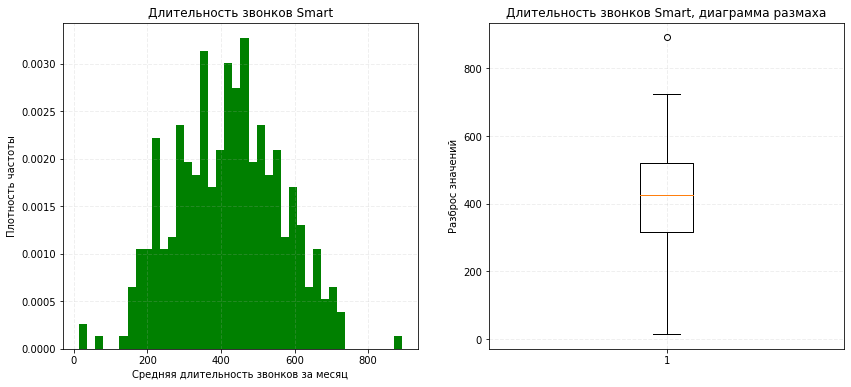

In [19]:
calls_duration_smart['mean_month'] = calls_duration_smart.mean(axis=1)
draw_hist(calls_duration_smart['mean_month'], 'Длительность звонков Smart', 'Средняя длительность звонков за месяц')  

В целом распределение выглядит нормальным, есть небольшие выступы по краям. На диаграмме размаха отметим выброс у верхней границы. Позже проверим его наличие, отложив от центра по три стандартных отклонения. 

Рассчитаем значение выборочного среднего как равное арифметическому среднему всех возможных значений параметра duration.

In [20]:
calls_d_mean = calls_duration_smart.mean()
print('Выборочное среднее длительности звонка, Smart: {:.2f} минут'.format(calls_d_mean['mean_month']))

Выборочное среднее длительности звонка, Smart: 420.85 минут


Оценим положение истинного среднего (mu), рассчитаем для него доверительный интервал.

In [21]:
print('Доверительный интервал для истинного среднего', (st.t.interval(0.95, len(calls_duration_smart['mean_month'])-1, loc=np.mean(calls_duration_smart['mean_month']), scale=st.sem(calls_duration_smart['mean_month']))))

Доверительный интервал для истинного среднего (405.74537793345735, 435.9506610482548)


С вероятностью 0.95 наше истинное среднее будет находится в диапазоне от 405 до 436 минут. Можно предположить, что функция плотности распределения вероятностей где-то на этом отрезке принимает максимальное значение. 

Посчитаем дисперсию и стандартное отклонение.
Поскольку у нас имеется только выборка в 500 человек, дисперсию мы тоже считаем с поправкой количества степеней свободы n-1 (параметр ddof=1). Это будет менее точная цифра, чем расчет по всей генеральной совокупности.

In [22]:
print('Дисперсия равна {:.2f}'.format(np.var(calls_duration_smart['mean_month'], ddof=1)))
print('Стандартное отклонение равно {:.2f} минут'.format(np.std(calls_duration_smart['mean_month'], ddof=1)))

Дисперсия равна 20578.28
Стандартное отклонение равно 143.45 минут


Поскольку многие тесты для проверки гипотез чувствительны к экстремальным значениям, с помощью правила "трех сигм" (точнее, трех s для выборки) определим наличие выбросов и удалим их.
Посчитаем интервал, куда должны уложиться до 99% значений. 

Здесь есть одна трудность. По правилам сигмы откладываются влево и вправо от математического ожидания, расположение которого нам неизвестно. С одной стороны, у нас есть выборочное среднее и скорректированные для выборки дисперсия и стандартное отклонение. Последние значения, имеющие в своем знаменателе n-1 вместо n должны быть больше истинных характеристик и компенсировать незнание разницы между выборочным и истинным средним. С другой - мы точно не знаем, является наше распределение симметричным или скошенным, насколько длинными и толстыми будут хвосты. Поэтому немного отодвинем границы выбросов от среднего и отложим по три стандартных отклонения (рассчитанных по нашей выборке) с двух сторон не от выборочного среднего, а от границ доверительнго интервала для математического ожидания.

In [23]:
low = st.t.interval(0.95, len(calls_duration_smart['mean_month'])-1, loc=np.mean(calls_duration_smart['mean_month']), scale=st.sem(calls_duration_smart['mean_month']))[0] - (np.std(calls_duration_smart['mean_month'], ddof=1))*3
up = st.t.interval(0.95, len(calls_duration_smart['mean_month'])-1, loc=np.mean(calls_duration_smart['mean_month']), scale=st.sem(calls_duration_smart['mean_month']))[1] + (np.std(calls_duration_smart['mean_month'], ddof=1))*3
print('{:.2f}'.format(low), '{:.2f}'.format(up))

-24.61 866.30


Поскольку нижняя граница является отрицательным числом (-24.61), то выбросы будем искать только с правой стороны.
Выбросами будем считать все те значения длительности разговоров, которые выходят за рамки 867 минут в месяц. Выведем их долю в выборке и удалим.

In [24]:
print('Доля выбросов в наборе данных с длительностью звонков: {:.4f}'.format(calls_duration_smart.query('mean_month > 867')['mean_month'].count()/len(calls_duration_smart)))
calls_duration_smart = calls_duration_smart.query('mean_month < 867')

Доля выбросов в наборе данных с длительностью звонков: 0.0029


Далее в проекте анализ использования пакета услуг абонентами тарифов Smart и Ultra будет проводится по аналогичной схеме.

#### Сообщения

Построим гистограмму распределения значений messages.

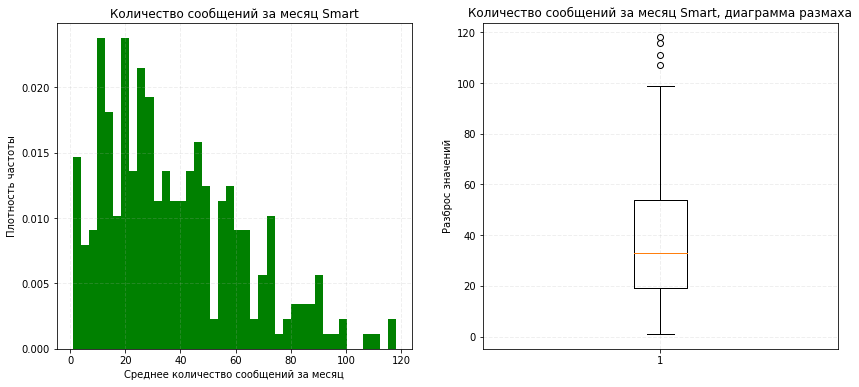

In [25]:
messages_group_smart['mean_month'] = messages_group_smart.mean(axis=1)
draw_hist(messages_group_smart['mean_month'], 'Количество сообщений за месяц Smart', 'Среднее количество сообщений за месяц')  

На гистограмме видна ярко выраженная положительная скошенность (вправо). Это значит, что  среднее тоже будет смещено в правую сторону. Подобная скошенность может быть обусловлена бурным развитием месседжеров, когда основная плотность значений сосредоточена около малого количества сообщений. При этом график не может плавно спуститься вниз влево, поскольку ограничен нулем (невозможно послать - 1 или -5 сообщений). Поэтому у оси у он выглядит обрезанным.
Также в наборе данных имеются выбросы в области больших значений.

Посчитаем выборочное среднее и выделим доверительный интервал, где может находится среднее настоящее.

In [26]:
messages_mean = messages_group_smart.mean()
print('Выборочное среднее количества сообщений, Smart: {:.2f} сообщений'.format(messages_mean['mean_month']))
print('Доверительный интервал для истинного среднего', (st.t.interval(0.95, len(messages_group_smart['mean_month'])-1, loc=np.mean(messages_group_smart['mean_month']), scale=st.sem(messages_group_smart['mean_month']))))

Выборочное среднее количества сообщений, Smart: 37.58 сообщений
Доверительный интервал для истинного среднего (34.76165680312009, 40.38955445802493)


С вероятностью 0.95 среднее генеральной совокупности будет находится где-то между 34 и 40 сообщениями в месяц.
Определим дисперсию и стандартное отклонение от выборочного среднего по тарифу Smart.

In [27]:
print('Дисперсия равна {:.2f}'.format(np.var(messages_group_smart['mean_month'], ddof=1)))
print('Стандартное отклонение равно {:.2f} сообщений'.format(np.std(messages_group_smart['mean_month'], ddof=1)))

Дисперсия равна 617.51
Стандартное отклонение равно 24.85 сообщений


Посчитаем границы, в пределы которых попадает более 99% значений случайной величины.

In [28]:
low = st.t.interval(0.95, len(messages_group_smart['mean_month'])-1, loc=np.mean(messages_group_smart['mean_month']), scale=st.sem(messages_group_smart['mean_month']))[0] - (np.std(messages_group_smart['mean_month'], ddof=1))*3
up = st.t.interval(0.95, len(messages_group_smart['mean_month'])-1, loc=np.mean(messages_group_smart['mean_month']), scale=st.sem(messages_group_smart['mean_month']))[1] + (np.std(messages_group_smart['mean_month'], ddof=1))*3
print('{:.2f}'.format(low), '{:.2f}'.format(up))

-39.79 114.94


Определим долю выбросов и удалим их.

In [29]:
print('Доля выбросов в наборе данных с количеством сообщений: {:.4f}'.format(messages_group_smart.query('mean_month > 115')['mean_month'].count()/len(messages_group_smart)))
messages_group_smart = messages_group_smart.query('mean_month < 115')

Доля выбросов в наборе данных с количеством сообщений: 0.0066


#### Интернет

Построим гистограмму распределения использования интернет-трафика за месяц.

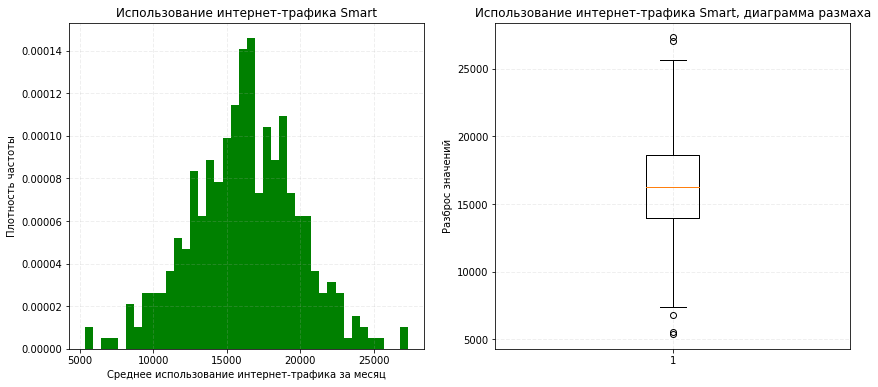

In [30]:
internet_group_smart['mean_month'] = internet_group_smart.mean(axis=1)
draw_hist(internet_group_smart['mean_month'], 'Использование интернет-трафика Smart', 'Среднее использование интернет-трафика за месяц')  

В целом распределение выглядит нормальным, возможно, присутствует небольшая отрицательная скошенность. Отметим наличие выбросов по обеим сторонам боксплота.

Посчитаем выборочное среднее и доверительный интервал для математического ожидания (mu).

In [31]:
internet_mean = internet_group_smart.mean()
print('Выборочное среднее использования интернет-трафика, Smart: {:.2f} мб'.format(internet_mean['mean_month']))
print('Доверительный интервал для истинного среднего', (st.t.interval(0.95, len(internet_group_smart['mean_month'])-1, loc=np.mean(internet_group_smart['mean_month']), scale=st.sem(internet_group_smart['mean_month']))))

Выборочное среднее использования интернет-трафика, Smart: 16237.00 мб
Доверительный интервал для истинного среднего (15855.685677796873, 16618.32035209387)


Выборочное среднее и интервал превосходят объем трафика, который предоставляется пользователям в рамках пакета Smart. Проверим, действительно ли половина абонентов не вписывается в тариф. Рассчитаем медиану.

In [32]:
print('Медиана среднего ежемесячного использования интернет-трафика, Smart: {:.2f} мб'.format(internet_group_smart['mean_month'].median()))

Медиана среднего ежемесячного использования интернет-трафика, Smart: 16289.30 мб


Да, медиана оказалась даже выше среднего. Больше половины абонентов тарифа Smart закупают дополнительные гигабайты. 
Определим дисперсию и стандартное отклонение.

In [33]:
print('Дисперсия равна {:.2f}'.format(np.var(internet_group_smart['mean_month'], ddof=1)))
print('Стандартное отклонение равно {:.2f} мб'.format(np.std(internet_group_smart['mean_month'], ddof=1)))

Дисперсия равна 13156112.19
Стандартное отклонение равно 3627.14 мб


Определим диапазон, в который попадает не менее 99% значений.

In [34]:
low = st.t.interval(0.95, len(internet_group_smart['mean_month'])-1, loc=np.mean(internet_group_smart['mean_month']), scale=st.sem(internet_group_smart['mean_month']))[0] - (np.std(internet_group_smart['mean_month'], ddof=1))*3
up = st.t.interval(0.95, len(internet_group_smart['mean_month'])-1, loc=np.mean(internet_group_smart['mean_month']), scale=st.sem(internet_group_smart['mean_month']))[1] + (np.std(internet_group_smart['mean_month'], ddof=1))*3
print('{:.2f}'.format(low), '{:.2f}'.format(up))

4974.28 27499.73


Посчитаем долю выбросов и удалим их.

In [35]:
print('Доля выбросов в наборе данных с количеством сообщений: {:.4f}'.format(internet_group_smart.query('mean_month < 4974 or mean_month > 27500')['mean_month'].count()/len(internet_group_smart)))
internet_group_smart = internet_group_smart.query('mean_month > 4974 and mean_month < 27500')

Доля выбросов в наборе данных с количеством сообщений: 0.0000


Правило "трех сигм" выбросов в наборе не выявило. Пороговые значения на диаграмме размаха оказались гораздо уже, чем расчет по стандартным отклонениям. Выведем границы, которые указал нам боксплот.

In [36]:
outliers_up = ((internet_group_smart['mean_month'].describe()['75%'] - internet_group_smart['mean_month'].describe()['25%'])*1.5 + internet_group_smart['mean_month'].describe()['75%']).round(1)
print('Верхняя граница начала выбросов: {}'.format(outliers_up))
outliers_down = (internet_group_smart['mean_month'].describe()['25%'] - (internet_group_smart['mean_month'].describe()['75%'] - internet_group_smart['mean_month'].describe()['25%'])*1.5).round(1)
print('Нижняя граница начала выбросов: {}'.format(outliers_down))

Верхняя граница начала выбросов: 25701.1
Нижняя граница начала выбросов: 6919.2


Да, "ящик с усами" довольно сильно сжал область значений, которые можно считать нормальными. Но, поскольку диаграмма размаха построена по выборочной совокупности, а не по генеральной, оставим эти данные в датасете.

### Тариф Ultra

#### Звонки

Построим гистограмму распределения длительности звонков по тарифу Ultra.

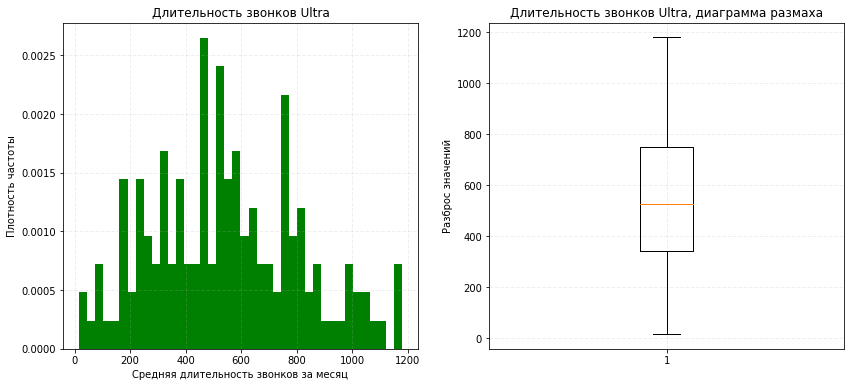

In [37]:
calls_duration_ultra['mean_month'] = calls_duration_ultra.mean(axis=1)
draw_hist(calls_duration_ultra['mean_month'], 'Длительность звонков Ultra', 'Средняя длительность звонков за месяц') 

Форма распределения выглядит довольно колоколообразной, только есть большие выступы по краям и, похоже, имеется утолщение хвоста справа. Диаграмма размаха выбросов не выявила.

Посчитаем выборочное среднее длительности звонков по тарифу Ultra и определим доверительный интервал, где может находится истинное среднее.

In [38]:
calls_d_mean = calls_duration_ultra.mean()
print('Выборочное среднее длительности звонка, Ultra: {:.2f} минут'.format(calls_d_mean['mean_month']))
print('Доверительный интервал для истинного среднего', (st.t.interval(0.95, len(calls_duration_ultra['mean_month'])-1, loc=np.mean(calls_duration_ultra['mean_month']), scale=st.sem(calls_duration_ultra['mean_month']))))

Выборочное среднее длительности звонка, Ultra: 547.00 минут
Доверительный интервал для истинного среднего (502.6807030248452, 591.3160996674121)


Средняя длительность звонка по тарифу Ultra хоть и больше, чем по тарифу Smart (там выборочная средняя равна 420.85 минутам), но все равно сильно меньше, чем предлагают условия пакета (до 3000 минут по тарифу Ultra). Из расчетов следует, что абоненты Ultra в среднем даже могут вписаться в рамки тарифа Smart (до 550 минут разговора включено в тариф). Это значит, что, скорее всего, примерно половина клиентов подключает себе тариф Ultra не из-за длительности звонков, а по другим причинам (возможно, их больше интересует количество сообщений или лимит он-лайн трафика).

Посчитаем дисперсию и стандартное отклонение.

In [39]:
print('Дисперсия равна {:.2f}'.format(np.var(calls_duration_ultra['mean_month'], ddof=1)))
print('Стандартное отклонение равно {:.2f} минут'.format(np.std(calls_duration_ultra['mean_month'], ddof=1)))

Дисперсия равна 71872.07
Стандартное отклонение равно 268.09 минут


Определим диапазон значений, когда среднее ежемесячное количество минут разговора для одного абонента не считается выбросом.

In [40]:
low = st.t.interval(0.95, len(calls_duration_ultra['mean_month'])-1, loc=np.mean(calls_duration_ultra['mean_month']), scale=st.sem(calls_duration_ultra['mean_month']))[0] - (np.std(calls_duration_ultra['mean_month'], ddof=1))*3
up = st.t.interval(0.95, len(calls_duration_ultra['mean_month'])-1, loc=np.mean(calls_duration_ultra['mean_month']), scale=st.sem(calls_duration_ultra['mean_month']))[1] + (np.std(calls_duration_ultra['mean_month'], ddof=1))*3
print('{:.2f}'.format(low), '{:.2f}'.format(up))

-301.59 1395.59


Верхняя граница довольно большая, 1396 минут. Возможно в датасете даже и нет таких значений (т.е. выбросов нет). Проверим это с помощью функции max().

In [41]:
print('Максимальное значение {:.2f}'.format(calls_duration_ultra['mean_month'].max()))

Максимальное значение 1179.36


#### Сообщения

Построим гистограмму распределения среднего количества сообщений в месяц.

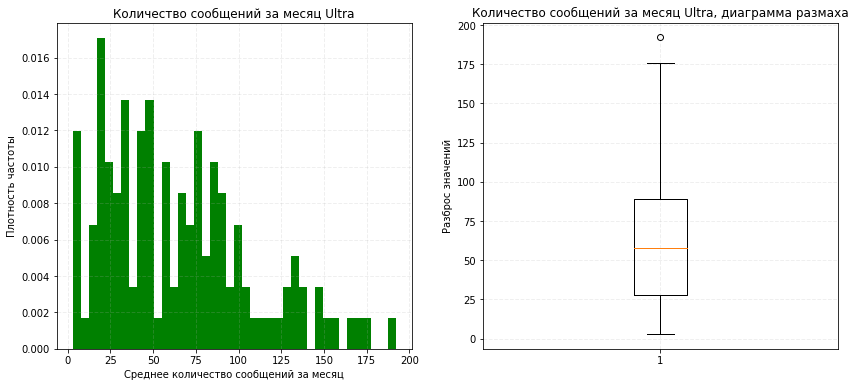

In [42]:
messages_group_ultra['mean_month'] = messages_group_ultra.mean(axis=1)
draw_hist(messages_group_ultra['mean_month'], 'Количество сообщений за месяц Ultra', 'Среднее количество сообщений за месяц') 

В целом форма распределения визуально очень похожа на форму распределения по тарифу Smart: такая же положительная скошенность и сосредоточение большинства пользователей в области с относительно небольшим ежемесячным количеством сообщений. Отличие заключается в том, что основание гистограммы для Ultra более широкое. Это говорит о том, что в среднем пользователи Ultra посылают больше сообщений, чем клиенты Smart. 

На диаграмме размаха имеется одиночный выброс сверху. Рассчитаем выборочное среднее и выделим доверительный интервал для математического ожидания.

In [43]:
messages_mean = messages_group_ultra.mean()
print('Выборочное среднее количества сообщений, Ultra: {:.2f} сообщений'.format(messages_mean['mean_month']))
print('Доверительный интервал для истинного среднего', (st.t.interval(0.95, len(messages_group_ultra['mean_month'])-1, loc=np.mean(messages_group_ultra['mean_month']), scale=st.sem(messages_group_ultra['mean_month']))))

Выборочное среднее количества сообщений, Ultra: 64.56 сообщений
Доверительный интервал для истинного среднего (56.84273703692092, 72.2688669057314)


В количестве отправленных сообщений действительно разница есть. Пользователи Ultra в среднем посылают в 2 раза больше sms, чем абоненты тарифа Smart. 

Посчитаем дисперсию и стандартное отклонение.

In [44]:
print('Дисперсия равна {:.2f}'.format(np.var(messages_group_ultra['mean_month'], ddof=1)))
print('Стандартное отклонение равно {:.2f} сообщений'.format(np.std(messages_group_ultra['mean_month'], ddof=1)))

Дисперсия равна 1882.75
Стандартное отклонение равно 43.39 сообщений


Стандартное отклонение по сообщениям тарифа Ultra тоже больше тарифа Smart примерно в 2 раза. 
Определим границы выбросов.

In [45]:
low = st.t.interval(0.95, len(messages_group_ultra['mean_month'])-1, loc=np.mean(messages_group_ultra['mean_month']), scale=st.sem(messages_group_ultra['mean_month']))[0] - (np.std(messages_group_ultra['mean_month'], ddof=1))*3
up = st.t.interval(0.95, len(messages_group_ultra['mean_month'])-1, loc=np.mean(messages_group_ultra['mean_month']), scale=st.sem(messages_group_ultra['mean_month']))[1] + (np.std(messages_group_ultra['mean_month'], ddof=1))*3
print('{:.2f}'.format(low), '{:.2f}'.format(up))

-73.33 202.44


Проверим, есть ли значения, которые выходят за эти пределы.

In [46]:
print('Максимальное значение {:.2f}'.format(messages_group_ultra['mean_month'].max()))

Максимальное значение 192.00


Несмотря на то, что диаграмма размаха выявила один выброс, его удалять не будем, поскольку сам боксплот был построен по выборочным данным, а не по генеральной совокупности.

#### Интернет

Построим гистограмму распределения среднего ежемесячного использование интернет-трафика.

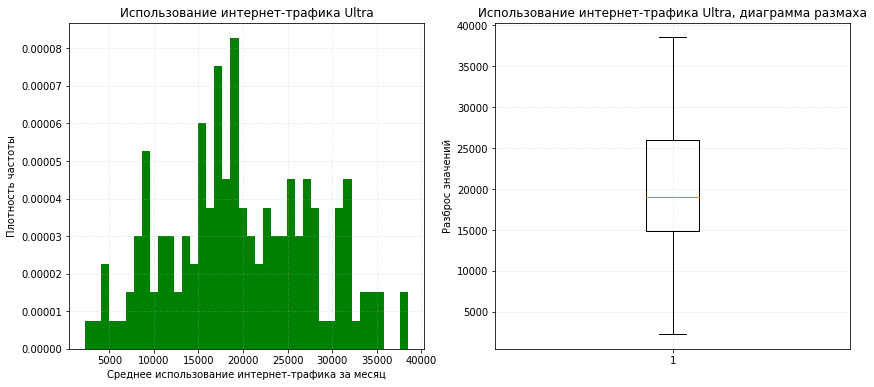

In [47]:
internet_group_ultra['mean_month'] = internet_group_ultra.mean(axis=1)
draw_hist(internet_group_ultra['mean_month'], 'Использование интернет-трафика Ultra', 'Среднее использование интернет-трафика за месяц') 

Распределение нормальное, по форме похоже на распределение тарифа Smart, но основание гистограммы Ultra гораздо шире в сторону больших значений использованных мб. Это значит, что в среднем пользователи Ultra больше времени проводят он-лайн, чем пользователи Smart.
Проверим это предположение, рассчитав среднее выборочное и доверительный интервал для истинного среднего.

In [48]:
internet_mean = internet_group_ultra.mean()
print('Выборочное среднее использования интернет-трафика, Ultra: {:.2f} мб'.format(internet_mean['mean_month']))
print('Доверительный интервал для истинного среднего', (st.t.interval(0.95, len(internet_group_ultra['mean_month'])-1, loc=np.mean(internet_group_ultra['mean_month']), scale=st.sem(internet_group_ultra['mean_month']))))

Выборочное среднее использования интернет-трафика, Ultra: 19762.44 мб
Доверительный интервал для истинного среднего (18429.470865796153, 21095.40033847199)


Да, пользователи Ultra действительно активнее пользуются интернетом по сравнению с абонентами Smart (там выборочное среднее равно 16237 мб).
Посчитаем дисперсию и стандартное отклонение.

In [49]:
print('Дисперсия равна {:.2f}'.format(np.var(internet_group_ultra['mean_month'], ddof=1)))
print('Стандартное отклонение равно {:.2f} мб'.format(np.std(internet_group_ultra['mean_month'], ddof=1)))

Дисперсия равна 66869619.03
Стандартное отклонение равно 8177.38 мб


Разброс средних значений использованных мб для тарифа Ultra тоже больше (8177.38 мб против 3627.14 для тарифа Smart).

Определим границы выбросов.

In [50]:
low = st.t.interval(0.95, len(internet_group_ultra['mean_month'])-1, loc=np.mean(internet_group_ultra['mean_month']), scale=st.sem(internet_group_ultra['mean_month']))[0] - (np.std(internet_group_ultra['mean_month'], ddof=1))*3
up = st.t.interval(0.95, len(internet_group_ultra['mean_month'])-1, loc=np.mean(internet_group_ultra['mean_month']), scale=st.sem(internet_group_ultra['mean_month']))[1] + (np.std(internet_group_ultra['mean_month'], ddof=1))*3
print('{:.2f}'.format(low), '{:.2f}'.format(up))

-6102.68 45627.55


Проверим, превышает ли максимальное среднее значение датасета верхнюю границу выбросов (45627.55 мб). Если нет, то выбросы не обнаружены.

In [51]:
print('Максимальное значение {:.2f}'.format(internet_group_ultra['mean_month'].max()))

Максимальное значение 38502.00


### Вывод

Анализ показал, что в среднем абоненты тарифа Ultra используют больший объем услуг, чем клиенты Smart. Пользователи обоих тарифов в большинстве своем вписываются в рамки предоставленного лимита по звонкам и сообщениям. 

Средняя длительность разговоров по тарифу Smart около 421 минуты, что вполне укладывается в порог 550 минут. Но здесь нужно отметить, что прибавляя стандартное отклонение вправо (143,5 минуты), мы уже "первой сигмой" выходим за границу лимита в 550 рублей. Это значит, что порядка 15% пользователей закупают дополнительные минуты (а 85% хватает предоставленного времени). Примерно такая же картина с сообщениями (среднее - 37-38 сообщений, стандартное отклонение - 25 сообщений).
    
С подключениями к сети ситуация иная. Исследование выявило, что абонентам Smart довольно тесно в пределах оговоренного лимита для интернет-соединения. Больше половины пользователей превышают ограничение и закупают дополнительные гигабайты. Выборочное среднее и медианное значение (16237.00 и 16289.30 мб соответственно) превышают установленный лимит в 15360 мб. Далее мы проверим, а сколько вообще денег пользователи тратят на мобильную связь, и будет ли им удобнее перейти на более дорогой тариф.

Что касается тарифа Ultra, то его клиенты чувствуют себя свободно. И хотя среднее по длительности звонков у них выше, чем у абонентов Smart - 547.00 минут, а стандартное отклонение больше Smart почти в 2 раза (268.09 минут), Мегалайн предоставляет им целых 3000 минут в рамках тарифа. Этого более чем достаточно, чтобы не думать об ограничениях. Порог в 1000 сообщений также практически не оставляет шансов на перерасход (в среднем по выборке пользователи отправляют всего 65 сообщений, стандартное отклонение примерно 44 сообщения). Вероятнее всего, пользователи (по крайней мере, половина из них) подключили себе тариф Ultra, в основном, из-за сетевого трафика. Среднее значение потраченных мегабайт - 19762.44. Это явно много, чтобы воспользоваться предложением подешевле. А со стандартным отклонением в 8177.38 мегабайт некоторым абонентам даже не хватит и тарифа Ultra.

Нужно учесть, что все расчеты проводились по одной выборочной совокупности, а это всегда может повлечь за собой определенные погрешности в выводах. Другое важное обстоятельство заключается в самом методе исследования. В работе гисторгаммы и расчеты делаются не на основании среднего, полученного путем длительности разговоров, поделенной на количество звонков и количество дней, а на основании среднего средних. Т.е. сначала расчитывалось среднее для каждого пользователя по каждому месяцу, а уже затем по средним значениям каждого месяца высчитывалось общее среднее. Но сами периоды для определения средних могут быть неоднородны. Например, абонент только что подключился (допустим, 27 марта), и до 31 марта включительно (т.е. всего за пять дней) он пошлет не так много сообщений и потратит не слишком много трафика. Поэтому средние показатели могут подвинуться в меньшую сторону.

## Проверка гипотез

### Доходность Smart и Ultra

Наконец-то определим, какой тариф приносит больше денег от одного пользователя. 

<div style="border: solid green 2px; padding: 10px">
За основу возьмем <strong>нулевую гипотезу</strong>, что средняя выручка тарифов Smart и Ultra не отличается. Вернее, все выявленные отличия в доходах можно объяснить случайностью. 

<strong>Альтернативная гипотеза</strong> будет заключатся в том, что с большой (или значительной) вероятностью найденные отличия не случайны, и между уровнем дохода и тарифом есть определенная связь.
</div>

Взглянем на гистограмму распределений доходов по тарифам.

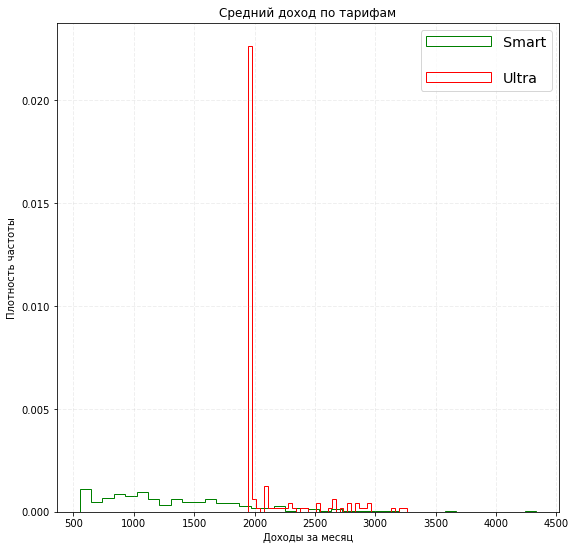

In [52]:
fig, ax = plt.subplots(figsize=(9,9))

ax.hist(total_cost_smart['mean_month'], density=True, bins=40, color='green', histtype='step')
ax.hist(total_cost_ultra['mean_month'], density=True, bins=40, color='red', histtype='step')
ax.set_title('Средний доход по тарифам')
ax.set_xlabel('Доходы за месяц')
ax.set_ylabel('Плотность частоты')
ax.grid(alpha=0.2, linestyle='--', linewidth=1)
labels= ["Smart","Ultra"]

ax.legend(labels, fontsize='x-large', labelspacing=1.5, handlelength=4.5)

Гистограммы двух распределений не похожи друг на друга. График доходности Smart широкий и довольно плоский. Он медленно спускается к нулевым значениям частоты, резких выступов нет. Можно сказать, "размазан" по оси абсцисс. Набор средних ежемесячных доходов от пользователей тарифа весьма разнообразен и отличается большим диапазоном.
Гистограмма Ultra совершенно иная и начинается с огромного пика на значении 1950 (стоимость тарифа), основание гистограммы намного уже. Это говорит о том, что большинство абонентов Ultra укладываются в лимиты и за дополнительные пакеты не платят. Но это также может свидетельствовать, что для многих пользователей тариф избыточен, и платят они больше, чем платили бы будучи абонентами Smart.
Похоже, что отличия в доходности будут значимы. Позже проверим это.
Для оценки доходности тарифов рассчитаем средние, дисперсию и уровень значимости.

In [53]:
print('Выборочный средний ежемесячный доход от пользователя тарифа (ARPU), Smart {:.2f}'.format(total_cost_smart['mean_month'].mean()))
print('Выборочный средний ежемесячный доход от пользователя тарифа (ARPU), Ultra {:.2f}'.format(total_cost_ultra['mean_month'].mean()))

Выборочный средний ежемесячный доход от пользователя тарифа (ARPU), Smart 1329.73
Выборочный средний ежемесячный доход от пользователя тарифа (ARPU), Ultra 2087.42


Даже с учетом закупки дополнительных минут, сообщений или гигабайт, для абонентов Smart связь в среднем обходится на 620 рублей (1950-1330) дешевле, чем если бы они перешли на Ultra.

Посмотрим, как сильно отличаются дисперсии двух тарифов.

In [54]:
print('Дисперсия, тариф Smart: {:.2f}'.format(np.var(total_cost_smart['mean_month'])))
print('Дисперсия, тариф Ultra: {:.2f}'.format(np.var(total_cost_ultra['mean_month'])))
print('Отношение дисперсий тарифа Smart к тарифу Ultra: {:.2f}'.format(np.var(total_cost_smart['mean_month']) / np.var(total_cost_ultra['mean_month'])))

Дисперсия, тариф Smart: 367217.09
Дисперсия, тариф Ultra: 89897.64
Отношение дисперсий тарифа Smart к тарифу Ultra: 4.08


Рассчитаем уровень значимости, за пороговое значение примем стандартные 0,05. Поскольку дисперсия тарифа Smart в 4 раза больше дисперсии Ultra, то в параметре equal_var укажем False.

In [55]:
print(st.ttest_ind(total_cost_smart['mean_month'], total_cost_ultra['mean_month'], equal_var=False), '\n')
if st.ttest_ind(total_cost_smart['mean_month'], total_cost_ultra['mean_month'], equal_var=False)[1] < 0.05:
    print('Нулевая гипотеза отвергнута, принята альтернативная')
else:
    print('Нулевая гипотеза не отвергается')

Ttest_indResult(statistic=-18.575842163596015, pvalue=1.5026228308148506e-58) 

Нулевая гипотеза отвергнута, принята альтернативная


Р-значение очень низкое. Это значит, что, скорее всего, нулевая гипотеза неверна. Теперь в качестве основной гипотезы можно принять альтернативную: имеется значительная разница в доходах между тарифами, и этот результат вряд ли можно объяснить случайностью.

Наши расчеты показали, что тариф Ultra приносит больше дохода с одного абонента. Однако неплохо было бы понимать, а какова вообще общая доходность по тарифам в абсолютных цифрах. Посчитаем, сколько всего денег (по выборочной совокупности) принес нам каждый тариф в среднем. 

In [56]:
print('Средний ежемесячный доход от всех пользователей тарифа Smart {:.2f}'.format(total_cost_smart['mean_month'].sum()))
print('Средний ежемесячный доход от всех пользователей тарифа Ultra {:.2f}'.format(total_cost_ultra['mean_month'].sum()))

print('Доля дохода от тарифа Smart в общей выручке {:.2f}'.format(total_cost_smart['mean_month'].sum() / (total_cost_smart['mean_month'].sum() + total_cost_ultra['mean_month'].sum())))
print('Доля дохода от тарифа Ultra в общей выручке {:.2f}'.format(total_cost_ultra['mean_month'].sum() / (total_cost_smart['mean_month'].sum() + total_cost_ultra['mean_month'].sum())))

Средний ежемесячный доход от всех пользователей тарифа Smart 465404.27
Средний ежемесячный доход от всех пользователей тарифа Ultra 308937.78
Доля дохода от тарифа Smart в общей выручке 0.60
Доля дохода от тарифа Ultra в общей выручке 0.40


Посчитаем долю пользователей каждого тарифа в выборке. Сюда также включим тех, кто уже прервал действие договора на оказание услуг (поскольку свой вклад в формирование общего дохода они тоже внесли).

In [57]:
print('Доля пользователей тарифа Smart {:.2f}'.format(total_cost_smart['mean_month'].count() / (len(total_cost_smart) + len(total_cost_ultra))))
print('Доля пользователей тарифа Ultra {:.2f}'.format(total_cost_ultra['mean_month'].count() / (len(total_cost_smart) + len(total_cost_ultra))))

Доля пользователей тарифа Smart 0.70
Доля пользователей тарифа Ultra 0.30


Доход с абонента тарифа Ultra выше, но пользователей Smart гораздо больше, и вместе последние приносят больше денег. Т.е. Ultra прибыльней, а Smart берет оборотами.

### Доходность по Москве и регионам

Посчитаем, сильно ли разнятся между собой доходы от регионов и от Москвы. 

<div style="border: solid green 2px; padding: 10px">
Наша <strong>нулевая гипотеза</strong> заключается в том, что особой разницы по территориальному признаку в доходах нет, а видимые небольшие отличия вполне могут быть случайностью. 

Соответственно, <strong>альтернативная гипотеза</strong> будет означать то, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
</div>

Для каждой группы отфильтруем нужные значения.

In [58]:
total_cost_smart = total_cost_smart.join(users.set_index('user_id'), on='user_id', rsuffix='_y')
total_cost_ultra = total_cost_ultra.join(users.set_index('user_id'), on='user_id', rsuffix='_y')
smart_moscow = total_cost_smart.query('city == "Москва"')
smart_regions = total_cost_smart.query('city != "Москва"')
ultra_moscow = total_cost_ultra.query('city == "Москва"')
ultra_regions = total_cost_ultra.query('city != "Москва"')

Построим гистограмму для визуальной оценки поведения пользователей разных тарифов в Москве и регионах.

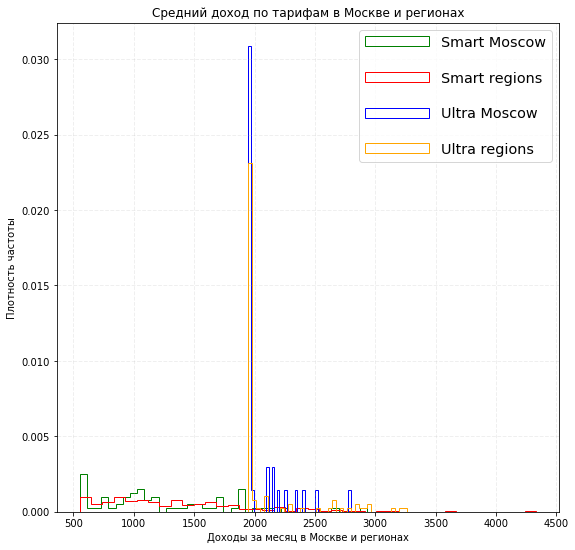

In [59]:
fig, ax = plt.subplots(figsize=(9,9))

ax.hist(smart_moscow['mean_month'], density=True, bins=40, color='green', histtype='step')
ax.hist(smart_regions['mean_month'], density=True, bins=40, color='red', histtype='step')
ax.hist(ultra_moscow['mean_month'], density=True, bins=40, color='blue', histtype='step')
ax.hist(ultra_regions['mean_month'], density=True, bins=40, color='orange', histtype='step')
ax.set_title('Средний доход по тарифам в Москве и регионах')
ax.set_xlabel('Доходы за месяц в Москве и регионах')
ax.set_ylabel('Плотность частоты')
ax.grid(alpha=0.2, linestyle='--', linewidth=1)
labels= ["Smart Moscow","Smart regions", "Ultra Moscow", "Ultra regions"]
ax.legend(labels, fontsize='x-large', labelspacing=1.5, handlelength=4.5)

Графики разных тарифов не похожи друг на друга, но по территориальному признаку отличий мало. 

Рассчитаем средние ежемесячные доходы от одного пользователя тарифа Smart и Ultra для Москвы и регионов.

In [60]:
print('Средний ежемесячный доход от пользователя тарифа Smart в Москве {:.2f}'.format(smart_moscow['mean_month'].mean()))
print('Средний ежемесячный доход от пользователя тарифа Ultra в Москве {:.2f}'.format(ultra_moscow['mean_month'].mean()))
print('Средний ежемесячный доход от пользователя тарифа Smart в регионах {:.2f}'.format(smart_regions['mean_month'].mean()))
print('Средний ежемесячный доход от пользователя тарифа Ultra в регионах {:.2f}'.format(ultra_regions['mean_month'].mean()))

Средний ежемесячный доход от пользователя тарифа Smart в Москве 1238.11
Средний ежемесячный доход от пользователя тарифа Ultra в Москве 2060.56
Средний ежемесячный доход от пользователя тарифа Smart в регионах 1351.42
Средний ежемесячный доход от пользователя тарифа Ultra в регионах 2094.83


Как и ожидалось, есть большая разница между тарифами, а вот доходы, рассчитанные по территориальному признаку, абсолютно идентичны.
Посмотрим на дисперсию для разных групп.

In [61]:
print('Дисперсия, тариф Smart Москва: {:.2f}'.format(np.var(smart_moscow['mean_month'])))
print('Дисперсия, тариф Ultra Москва: {:.2f}'.format(np.var(ultra_moscow['mean_month'])))
print('Дисперсия, тариф Smart регионы: {:.2f}'.format(np.var(smart_regions['mean_month'])))
print('Дисперсия, тариф Ultra регионы: {:.2f}'.format(np.var(ultra_regions['mean_month'])))
print('Отношение дисперсий тарифа Smart в Москве и регионах: {:.2f}'.format(np.var(smart_regions['mean_month']) / np.var(smart_moscow['mean_month'])))
print('Отношение дисперсий тарифа Ultra в Москве и регионах: {:.2f}'.format(np.var(ultra_regions['mean_month']) / np.var(ultra_moscow['mean_month'])))

Дисперсия, тариф Smart Москва: 295807.66
Дисперсия, тариф Ultra Москва: 40193.90
Дисперсия, тариф Smart регионы: 381665.81
Дисперсия, тариф Ultra регионы: 103355.21
Отношение дисперсий тарифа Smart в Москве и регионах: 1.29
Отношение дисперсий тарифа Ultra в Москве и регионах: 2.57


In [62]:
print(st.ttest_ind(smart_moscow['mean_month'], smart_regions['mean_month'], equal_var=True), '\n')
if st.ttest_ind(smart_moscow['mean_month'], smart_regions['mean_month'], equal_var=True)[1] < 0.05:
    print('Нулевая гипотеза отвергнута, принята альтернативная')
else:
    print('Нулевая гипотеза не отвергается')

Ttest_indResult(statistic=-1.3759523910362812, pvalue=0.1697212180681678) 

Нулевая гипотеза не отвергается


In [63]:
print(st.ttest_ind(ultra_moscow['mean_month'], ultra_regions['mean_month'], equal_var=False), '\n')
if st.ttest_ind(ultra_moscow['mean_month'], ultra_regions['mean_month'], equal_var=False)[1] < 0.05:
    print('Нулевая гипотеза отвергнута, принята альтернативная')
else:
    print('Нулевая гипотеза не отвергается')

Ttest_indResult(statistic=-0.7312374229191734, pvalue=0.46680633975169483) 

Нулевая гипотеза не отвергается


В случае с обоими тарифами Р-значение оказалось слишком большим, чтобы отбросить нулевую гипотезу. Мы можем утверждать, что с большой вероятностью разницы в доходах по регионам нет. Люди везде говорят, пишут и используют глобальную сеть примерно одинаково. Внести изменения в этот результат по доходности может только разница в стоимости тарифа, а она у нас одна и та же для всей страны.

### Вывод

В исследовании проверены две гипотезы о том, что средняя выручка абонентов тарифов Ultra и Smart не имеет значимых отличий, и что средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов. 

В первом случае расчеты выявили, что, скорее всего, верно обратное, и тарифы по своей выручке с одного абонента не похожи друг на друга.

Во втором нулевая гипотеза отвергнута не была. Клиенты Мегалайна тратят одинаковое количество денег на услуги связи вне зависимости от места проживания. Тем не менее, это вовсе не означает, что нулевая гипотеза верна. Это значит, что в данном исследовании мы не обнаружили значимых различий.

## Общий вывод

С точки зрения доходности с одного клиента более прибыльным тарифом является Ultra, но по доле в общей выручке большую выгоду приносит Smart (0,4 и 0,6 соответственно). Следует отметить, что наши расчеты не принимают во внимание доли косвенных и прямых затрат в тарифе.

В общем, для увеличения доходности есть два пути: либо нарастить свою долю рынка (привлечение новых пользователей от других операторов), либо повысить платежи для актуальных клиентов (например, перевести хотя бы часть своих клиентов на тариф Ultra, повысить стоимость Smart, предложить дополнительные услуги или новые тарифы). Первый способ обычно более затратный, а второй более рискованный в плане удержания абонентов.

Судя по результатам, большинству "юзеров" все-таки выгоднее брать тариф Smart и доплачивать за определенные услуги, если стандартного пакета не хватает. Для них это все-равно получается дешевле, чем платить сразу за Ultra.
Поэтому перевод пользователей на более дорогостоящий тариф представляется сложной задачей. Непросто объяснить клиентам, почему они должны платить в среднем на 620 рублей больше за услуги, которые не используют.

Возможно, имеет смысл предложить новые линейки тарифов с увеличенным лимитом на интернет и соответственно, большей стоимостью (где-то между Smart и Ultra). Это позволить рассчитывать на более высокий и фиксированный доход с пользователя и лучше планировать финансовую деятельность. С другой стороны не исключен побочный эффект, когда абоненты тарифа Ultra перейдут на новый и более дешевый тариф, что нивелирует все усилия по увеличению прибыли. С точки зрения руководства оператора - довольно сомнительное достижение.

В данном случае наиболее эффективной может оказаться кампания, направленная на сегмент пользователей, у которых затраты на мобильную связь близки к стоимости тарифа Ultra. Им можно предложить перейти на этот тариф.